In [81]:
import pandas as pd

df = pd.read_excel('promo_history.xlsx')
df

,Unnamed: 0,start_dttm,end_dttm,skutertiaryid,promotypeid,chaindiscountvalue,0
0,0,2019-01-16,2019-01-29,7205,67,0.228495,897
1,1,2019-01-16,2019-01-29,7234,67,0.239229,900
2,3,2019-02-13,2019-02-26,7182,70,0.233531,894
3,4,2019-02-13,2019-02-26,7205,67,0.221040,897
4,5,2019-02-13,2019-02-26,7234,67,0.216858,900
...,...,...,...,...,...,...,...
98,151,2021-06-09,2021-06-15,7247,70,0.150000,636
99,156,2021-06-30,2021-07-06,7189,70,0.300000,636
100,157,2021-06-30,2021-07-06,7194,70,0.300000,636
101,158,2021-06-30,2021-07-06,7205,70,0.250000,636


In [82]:
df2 = pd.read_csv('sales_history.csv')

,Unnamed: 0,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt
0,0,174.416390,2,7182,293136,2018-04-30
1,1,261.641400,3,7182,293136,2018-04-23
2,2,78.750250,1,7182,296672,2018-04-30
3,3,630.035630,8,7182,296672,2018-04-23
4,4,239.120510,3,7182,296833,2018-04-30
...,...,...,...,...,...,...
15259989,20083899,1396.308385,21,7182,320402,2020-12-28
15259990,20083900,729.517920,10,7182,320402,2020-12-21
15259991,20083903,197.584800,2,7182,320402,2020-12-01
15259992,20083904,395.169600,4,7182,320402,2020-12-07


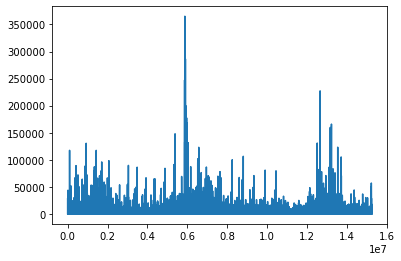

In [9]:
import numpy as np
import plotly.express as px

df2['sale_dt'] = pd.to_datetime(df2['sale_dt'])
df2.salerevenuerub.plot()
df2

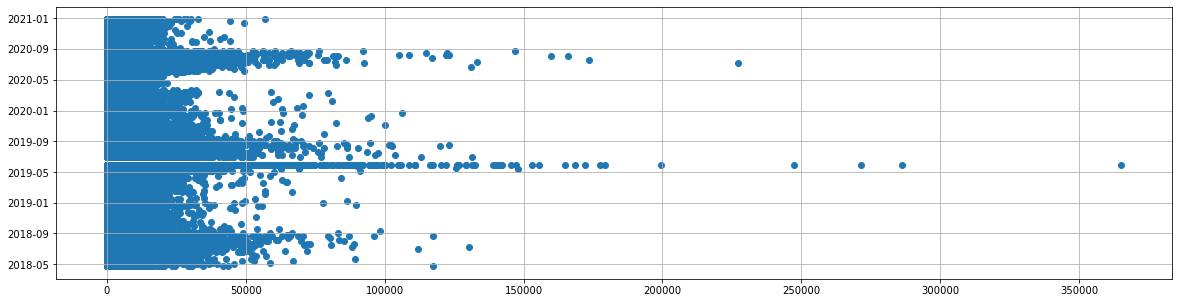

,Date,Date_blocks
0,2018-04-30,174.416390
1,2018-04-23,261.641400
2,2018-04-30,78.750250
3,2018-04-23,630.035630
4,2018-04-30,239.120510
...,...,...
15259989,2020-12-28,1396.308385
15259990,2020-12-21,729.517920
15259991,2020-12-01,197.584800
15259992,2020-12-07,395.169600


In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools 
import warnings

pd.to_datetime(df2.sale_dt,dayfirst = True)
Date_time = pd.to_datetime(df2.sale_dt,dayfirst = True)
X1 = df2.salerevenuerub
X2 = df2.soldpieces
X3 = df2.skutertiaryid
X4 = df2.posid
#Y = df2.item_cnt_day

Date_by_blocks = pd.DataFrame({"Date": Date_time,"Date_blocks": X1})
Date_by_soldpieces = pd.DataFrame({"Date": Date_time,"soldpieces": X2})
#Date_by_items_id = pd.DataFrame({"Date": Date_time,"Items_id": X3})
#Date_by_price = pd.DataFrame({"Date": Date_time,"Price": X4})
#Date_by_sales_count = pd.DataFrame({"Date": Date_time,"Sales_count": Y})

Date_by_blocks.sort_values(by=['Date'])
ys = Date_by_blocks.Date
xs = Date_by_blocks.Date_blocks
plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.grid(True)
plt.show()
Date_by_blocks

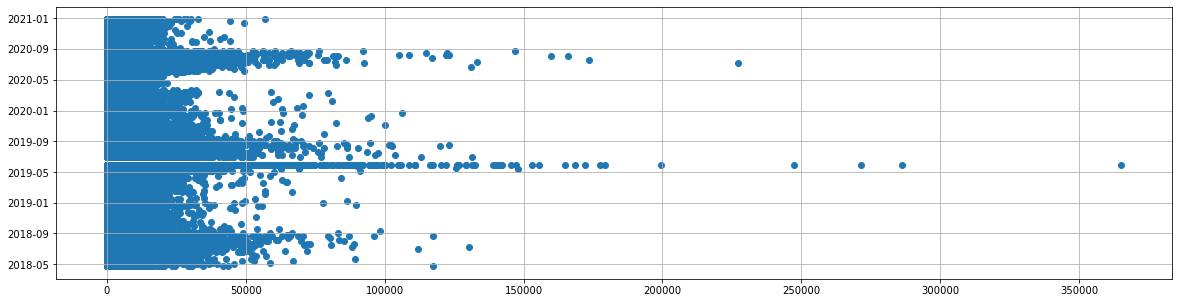

,Date,soldpieces
0,2018-04-30,2
1,2018-04-23,3
2,2018-04-30,1
3,2018-04-23,8
4,2018-04-30,3
...,...,...
15259989,2020-12-28,21
15259990,2020-12-21,10
15259991,2020-12-01,2
15259992,2020-12-07,4


In [57]:
Date_by_soldpieces.sort_values(by=['Date'])
ys11 = Date_by_soldpieces.Date
xs11 = Date_by_soldpieces.soldpieces
plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.grid(True)
plt.show()
Date_by_soldpieces

C:\Users\LENOVO_30032373\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


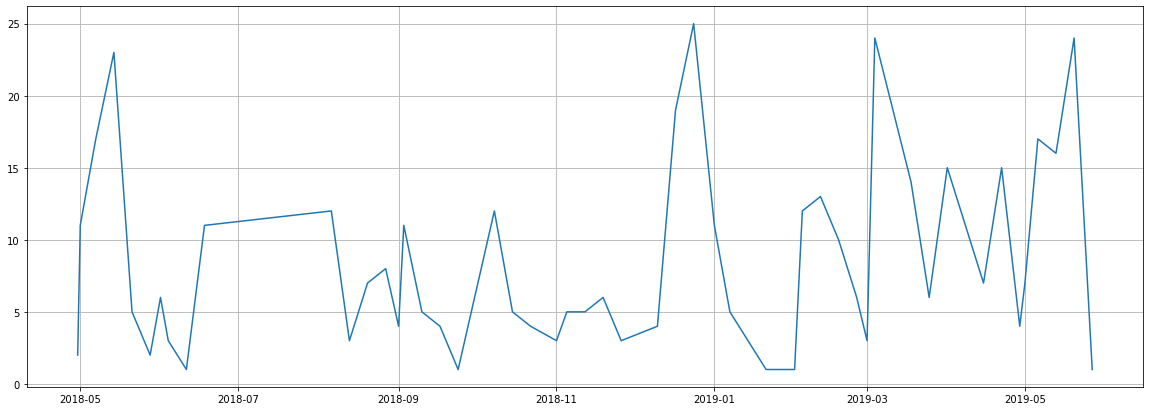

In [59]:
boof2 = df2[(df2.skutertiaryid == 7182) & (df2.posid == 293136)]
boof2.date = pd.to_datetime(boof2.sale_dt,dayfirst = True)
boof2 = boof2.sort_values("sale_dt")
xs12 = boof2[(boof2.sale_dt > "2018-04-23") & (boof2.sale_dt < "2020-12-14")].sale_dt
ys12 = boof2[(boof2.sale_dt > "2018-04-23")  & (boof2.sale_dt < "2020-12-14")].soldpieces
data11 = boof2[(boof2.sale_dt > "2018-04-23") & (boof2.sale_dt < "2020-12-14")]
plt.figure(figsize=(20,7))
plt.plot(xs12, ys12)
plt.grid(True)
plt.show()

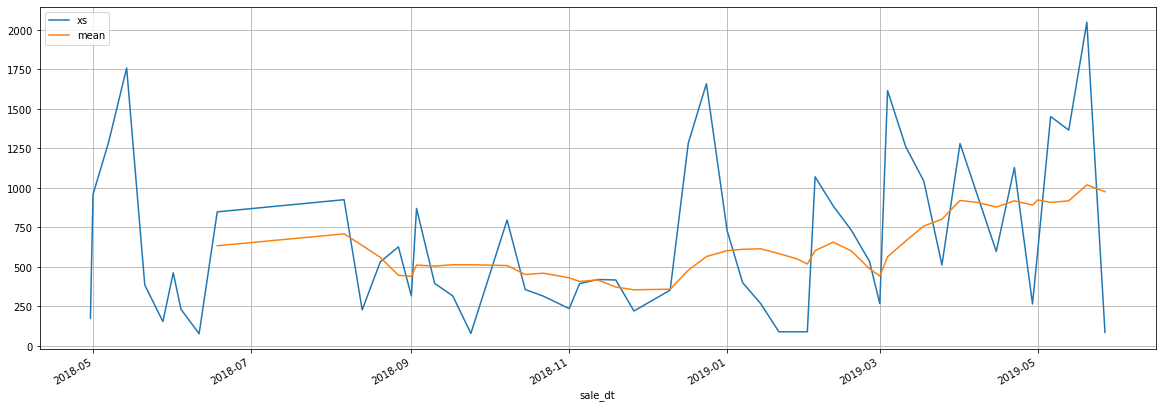

In [12]:
dff = pd.DataFrame(np.array(ys), index=xs, columns=['xs'])
dff['mean'] = dff.rolling(10).mean()
dff.plot(figsize=(20,7))

plt.legend(loc='best')
plt.grid(True)
plt.show()

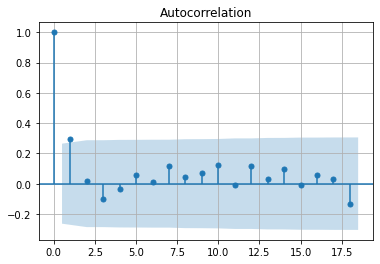

In [13]:
sm.graphics.tsa.plot_acf(ys)
plt.grid(True)
plt.show()

In [14]:
tryw = pd.DataFrame(np.array(ys), index=range(len(xs)))
model = SARIMAX(tryw)
model_fit = model.fit(disp=False)
yhat = model_fit.predict(0, len(ys))
model_fit.aic,len(yhat)

(852.8622651665091, 56)

In [60]:
tryw111 = pd.DataFrame(np.array(ys12), index=range(len(xs12)))
model111 = SARIMAX(tryw111)
model_fit111 = model111.fit(disp=False)
yhat111 = model_fit111.predict(0, len(ys12))
model_fit111.aic,len(yhat111)

(377.5098732149473, 56)

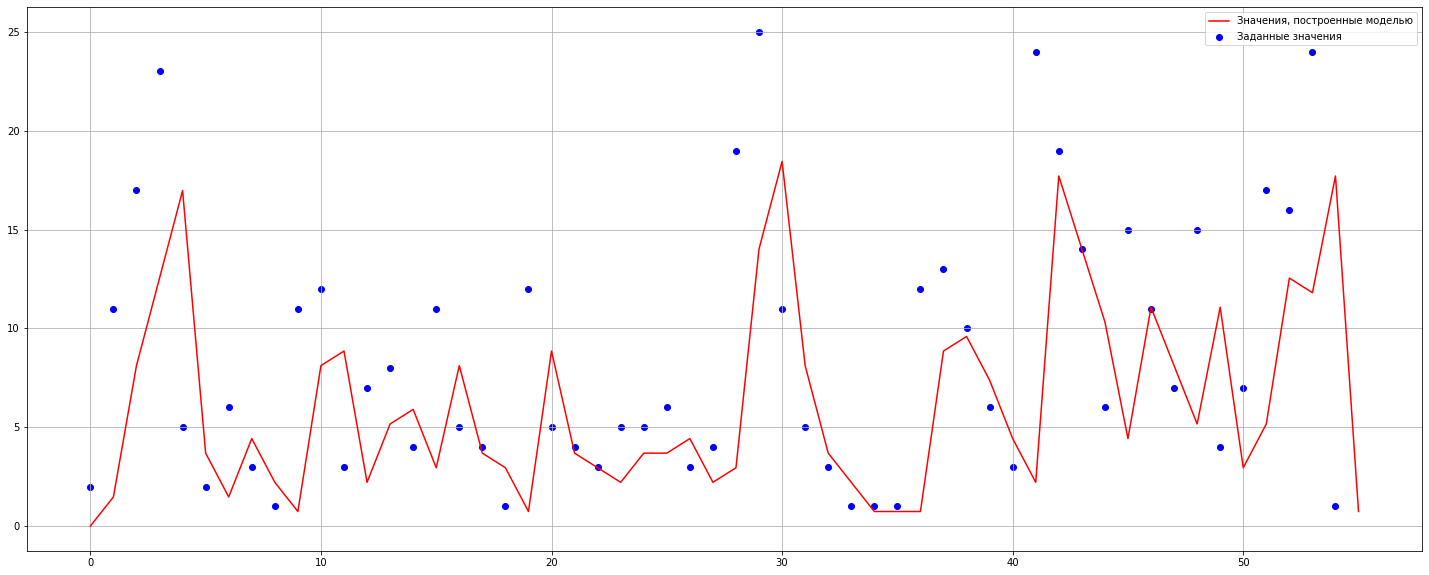

In [61]:
plt.figure(figsize=(25, 10))
plt.scatter(range(len(boof1[(boof2.sale_dt > "2018-04-23")  & (boof2.sale_dt < "2020-12-14")].salerevenuerub)), boof2[(boof2.sale_dt > "2018-04-23")  & (boof2.sale_dt < "2020-12-14")].soldpieces, c='b', label='Заданные значения')
plt.plot(yhat111, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

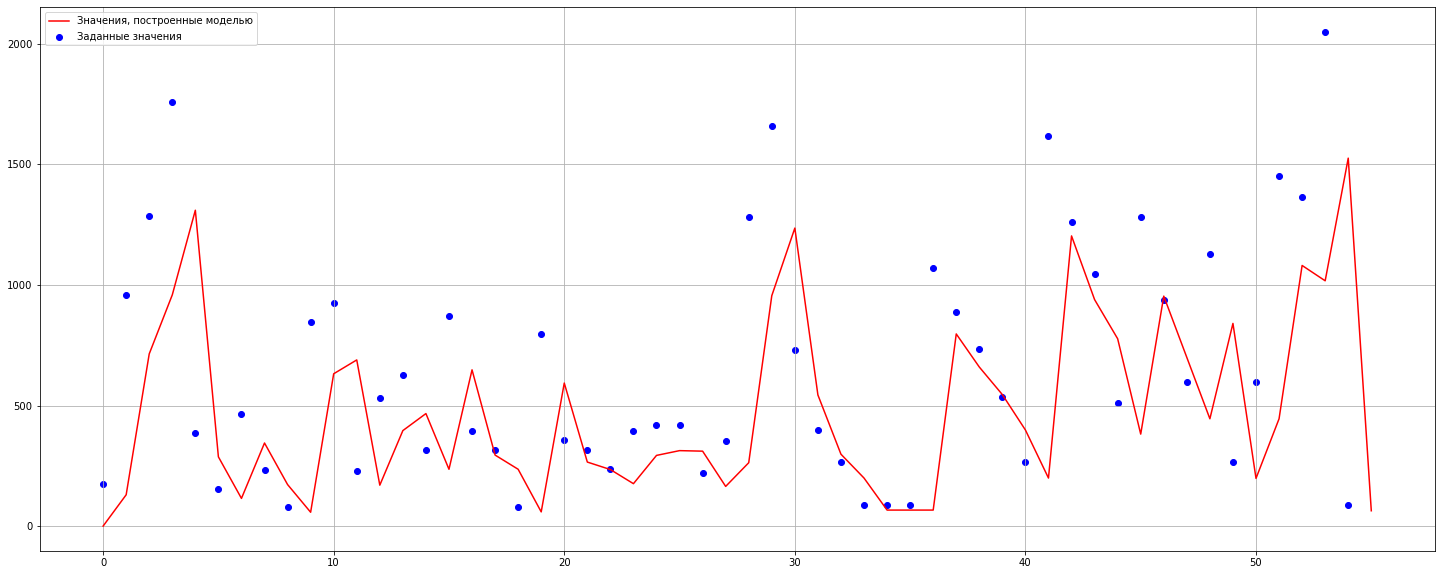

In [15]:
plt.figure(figsize=(25, 10))
plt.scatter(range(len(boof1[(boof1.sale_dt > "2018-04-23")  & (boof1.sale_dt < "2020-12-14")].salerevenuerub)), boof1[(boof1.sale_dt > "2018-04-23")  & (boof1.sale_dt < "2020-12-14")].salerevenuerub, c='b', label='Заданные значения')
plt.plot(yhat, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [16]:
ch = df[(df.skutertiaryid == 7182)]
ch
data= []
data2 = []
for j in range(0, len(boof1.sale_dt)):
    for i in range(0, len(ch.start_dttm)):
        q = boof1.iloc[j]['sale_dt']
        q1 = ch.iloc[i]['start_dttm']
        q2 = ch.iloc[i]['end_dttm']
        if (boof1.iloc[i]['sale_dt'] > q1) or (boof1.iloc[i]['sale_dt'] < q2):
            data.append(boof1.iloc[i - 1]['salerevenuerub'] - boof1.iloc[i]['salerevenuerub'])
            data2.append(ch.iloc[i]['promotypeid'])
dr = pd.DataFrame({'promotypeid':data2, 'perepad':data})
dr.perepad.unique()#выигрыш\проигрыш от акции
#yhat

array([-176.2326 ,   87.22501, -784.89057, -328.71083, -471.55986,
       1373.87518,  231.41924, -308.56646,  231.43045,  154.28323,
       -771.41615,  -77.1248 ,  697.67677, -304.00399,  -94.80297])

In [75]:
#import datetime
#import numpy as np
#start = datetime.datetime(2021,1,1)
#end = datetime.datetime(2021,6,1)
#daterange = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days, 7)]
#data = pd.DataFrame({'date':daterange})#.set_index('date')
#data.date

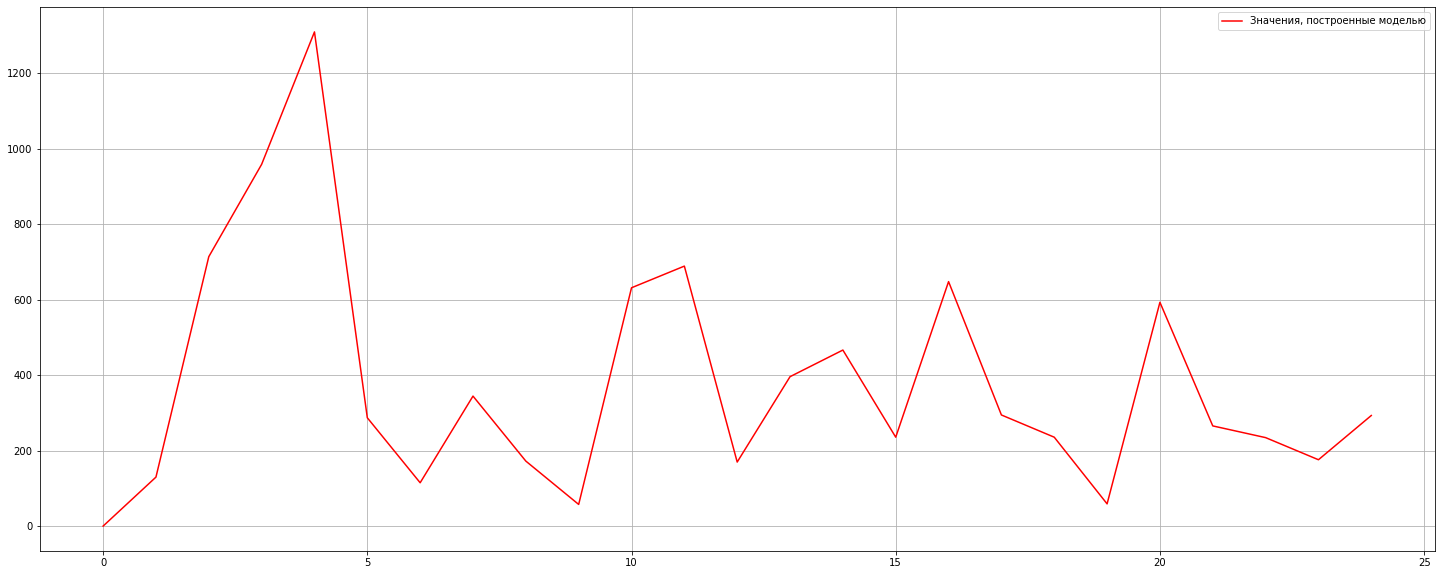

In [74]:
yhat11 = model_fit111.predict(0, 24)
model_fit111.aic,len(yhat11)
plt.figure(figsize=(25, 10))
plt.plot(yhat1, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()
#yhat11.round()

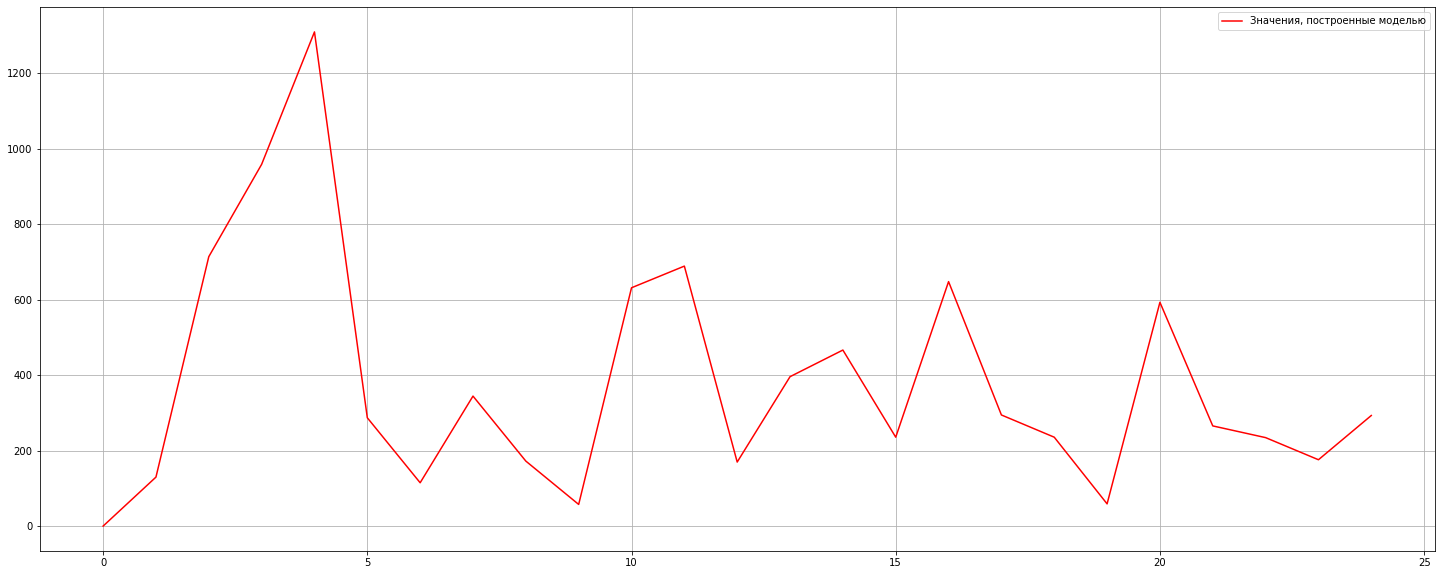

In [73]:
yhat1 = model_fit.predict(0, 24)
model_fit.aic,len(yhat1)
plt.figure(figsize=(25, 10))
plt.plot(yhat1, c='r', label='Значения, построенные моделью')
plt.grid(True)
plt.legend(loc='best')
plt.show()
#yhat1

In [87]:
date = ['2021-01-01', '2021-01-08', '2021-01-15', '2021-01-22', '2021-01-29', '2021-02-05', '2021-02-12', '2021-02-19', '2021-02-26', '2021-03-05', '2021-03-12', '2021-03-19', '2021-03-26', '2021-04-02', '2021-04-09', '2021-04-16', '2021-04-23', '2021-04-30', '2021-05-07', '2021-05-14', '2021-05-21', '2021-05-28', '2021-06-05', '2021-06-13', '2021-06-20']
yhat11[0] = 1
mean_price = yhat1/yhat11
yhat11 = yhat11.round()
delta = mean_price - mean_price.mean()
b_delta = delta*yhat11
dfr = pd.DataFrame({'price':yhat1, 'data':date, 'soldpieces':yhat11, 'mean_price':mean_price, 'delta':delta, 'b_delta':b_delta})
d_top = dfr.sort_values(by='b_delta')
#mean_price.mean()
#delta
d_top.head(10)

,price,data,soldpieces,mean_price,delta,b_delta
20,593.291246,2021-05-21,9.0,65.921250,-11.127503,-100.147530
0,0.000000,2021-01-01,1.0,0.000000,-77.048753,-77.048753
3,958.972650,2021-01-22,13.0,73.767127,-3.281626,-42.661137
21,265.585155,2021-05-28,4.0,66.396289,-10.652464,-42.609857
5,287.168487,2021-02-05,4.0,71.792122,-5.256631,-21.026525
9,57.430359,2021-03-05,1.0,57.430359,-19.618394,-19.618394
19,58.915987,2021-05-14,1.0,58.915987,-18.132766,-18.132766
24,293.177767,2021-06-20,4.0,73.294442,-3.754311,-15.017244
17,294.588279,2021-04-30,4.0,73.647070,-3.401683,-13.606733
11,689.197692,2021-03-19,9.0,76.577521,-0.471232,-4.241084


In [86]:
import matplotlib as plt
import seaborn as sns
sns.hist(d_top.head(10).data, d_top.head(10).mean_price)
plt.show()

AttributeError: module 'seaborn' has no attribute 'hist'

In [ ]:
split_date = '01-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

In [ ]:
X_train, y_train = create_features(pjme_train, label='PJME_MW')
X_test, y_test = create_features(pjme_test, label='PJME_MW')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)